# Data Exploration
In this section I will be attemping to provide insights on the project questions by performing exploratory data analysis on the datasets I gathered and cleaned. I will specifically be using the pandas and seaborn libraries for exploratory data analysis.

### NBA Player Combine and Season Data


#### Data overview

The NBA Player Combine and Season dataset contains a good number of features and datapoints. For this dataset, I am interested in looking at if there are physical and athletic predictors for vertical jump, and if vertical jump itself plays a role in determining on-court success in the NBA. The dataset consists of mostly continuous integer and float variable types, with a few categorical object type variables. There are a number of continous variables that indicate season statistics and on court-performance, as well as combine numbers that indicate physical and athletic attributes. 

In [220]:
import pandas as pd
import numpy as np

nba = pd.read_csv("../../../data/01-modified-data/cleaned_NBA_combined.csv")

print('Shape:', nba.shape)
print('--------------------')
print('Feature and Data Information:')
print(nba.info())



Shape: (886, 67)
--------------------
Feature and Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 886 entries, 0 to 885
Data columns (total 67 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     886 non-null    int64  
 1   Season                         886 non-null    int64  
 2   Name                           886 non-null    object 
 3   Team                           886 non-null    object 
 4   Position                       886 non-null    object 
 5   Started                        886 non-null    int64  
 6   Games                          886 non-null    int64  
 7   FantasyPoints                  886 non-null    float64
 8   Minutes                        886 non-null    int64  
 9   FieldGoalsMade                 886 non-null    float64
 10  FieldGoalsAttempted            886 non-null    float64
 11  FieldGoalsPercentage           886 non-nul

##### Summary stats for Variables of interest

I chose to highlight the summary statistics for a few significant variables that are of interest. Standing Vertical and Maximum Vertical are important because they are the key metric that I am interested in looking at. While similar, the key difference is that for Maximum vertical jump players were allowed a running start, while they are not for standing vertical. Points per Game, Rebounds per Game, and Assists per Game were included as they represent the three most tracked statistics in basketball, and are often the three stats most used to represent success. 

In [208]:

print("Standing Vertical Jump Summary Stats (inches)") 
print(nba["STANDING.VERTICAL"].describe())
print("------------------------------------")

print("Maximum Vertical Jump Summary Stats (inches)")
print(nba["MAX.VERTICAL"].describe())
print("------------------------------------")

print("Points Per Game Summary Stats")
print(nba["PPG"].describe())
print("------------------------------------")

print("Rebounds Per Game Summary Stats")
print(nba["RPG"].describe())
print("------------------------------------")

print("Assists Per Game Summary Stats")
print(nba["APG"].describe())
print("------------------------------------")

Standing Vertical Jump Summary Stats (inches)
count    766.000000
mean      29.695561
std        2.987566
min       21.500000
25%       27.500000
50%       29.500000
75%       31.500000
max       41.500000
Name: STANDING.VERTICAL, dtype: float64
------------------------------------
Maximum Vertical Jump Summary Stats (inches)
count    764.000000
mean      35.261780
std        3.538618
min       25.000000
25%       33.000000
50%       35.500000
75%       37.500000
max       48.000000
Name: MAX.VERTICAL, dtype: float64
------------------------------------
Points Per Game Summary Stats
count    880.000000
mean      11.009432
std        9.256269
min        0.000000
25%        3.700000
50%        8.750000
75%       16.100000
max       48.300000
Name: PPG, dtype: float64
------------------------------------
Rebounds Per Game Summary Stats
count    880.000000
mean       4.461250
std        3.743416
min        0.000000
25%        1.800000
50%        3.600000
75%        5.925000
max       24.90

#### Visualizations

For visualizations I used boxplots and histograms to look at the distribution of Max Vertical Jump. I decided to look at max vertical jump specifically since it serves as aa better representation of an athletes highest possibly jumping ability and was so closely correlated to standing vertical jump, meaning standing vertical would likely produce similar resents when looking at the correlation between it and other variables. I looked at the correlation of maximum vertical jump to a number of variables to indicate in-game performance, as well as other combine metrics. For some visualizations I split by position to see if the results varied by position. 

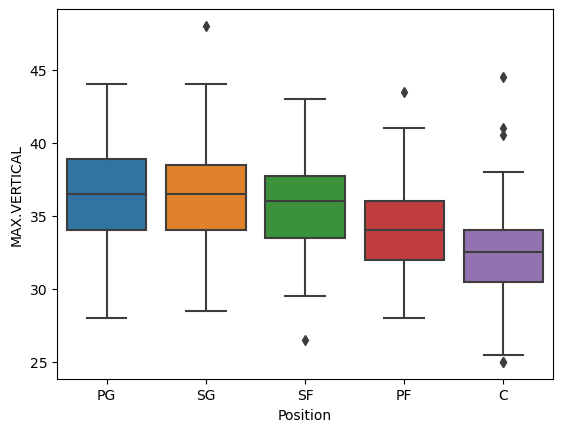

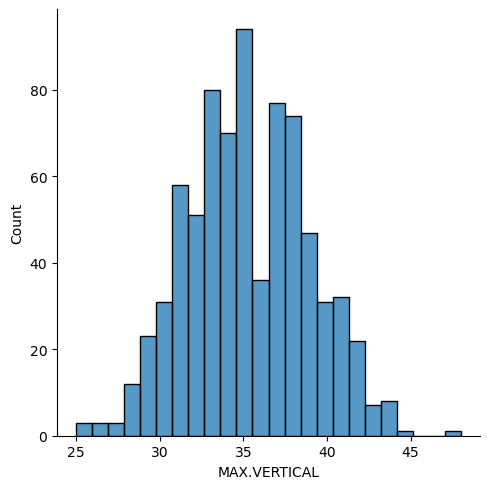

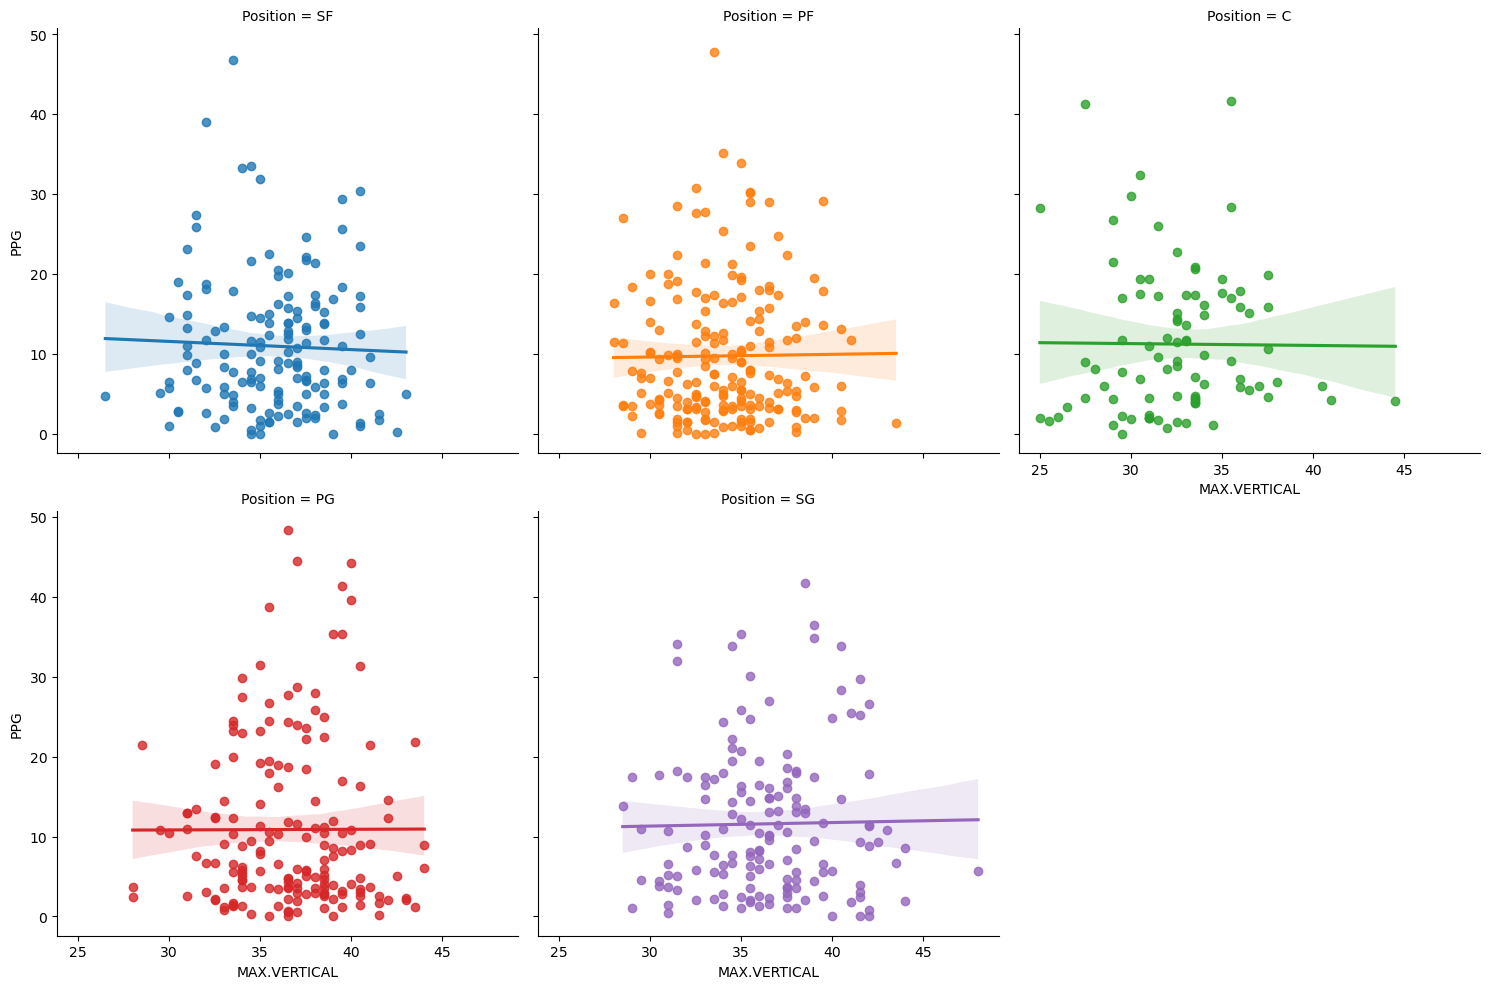

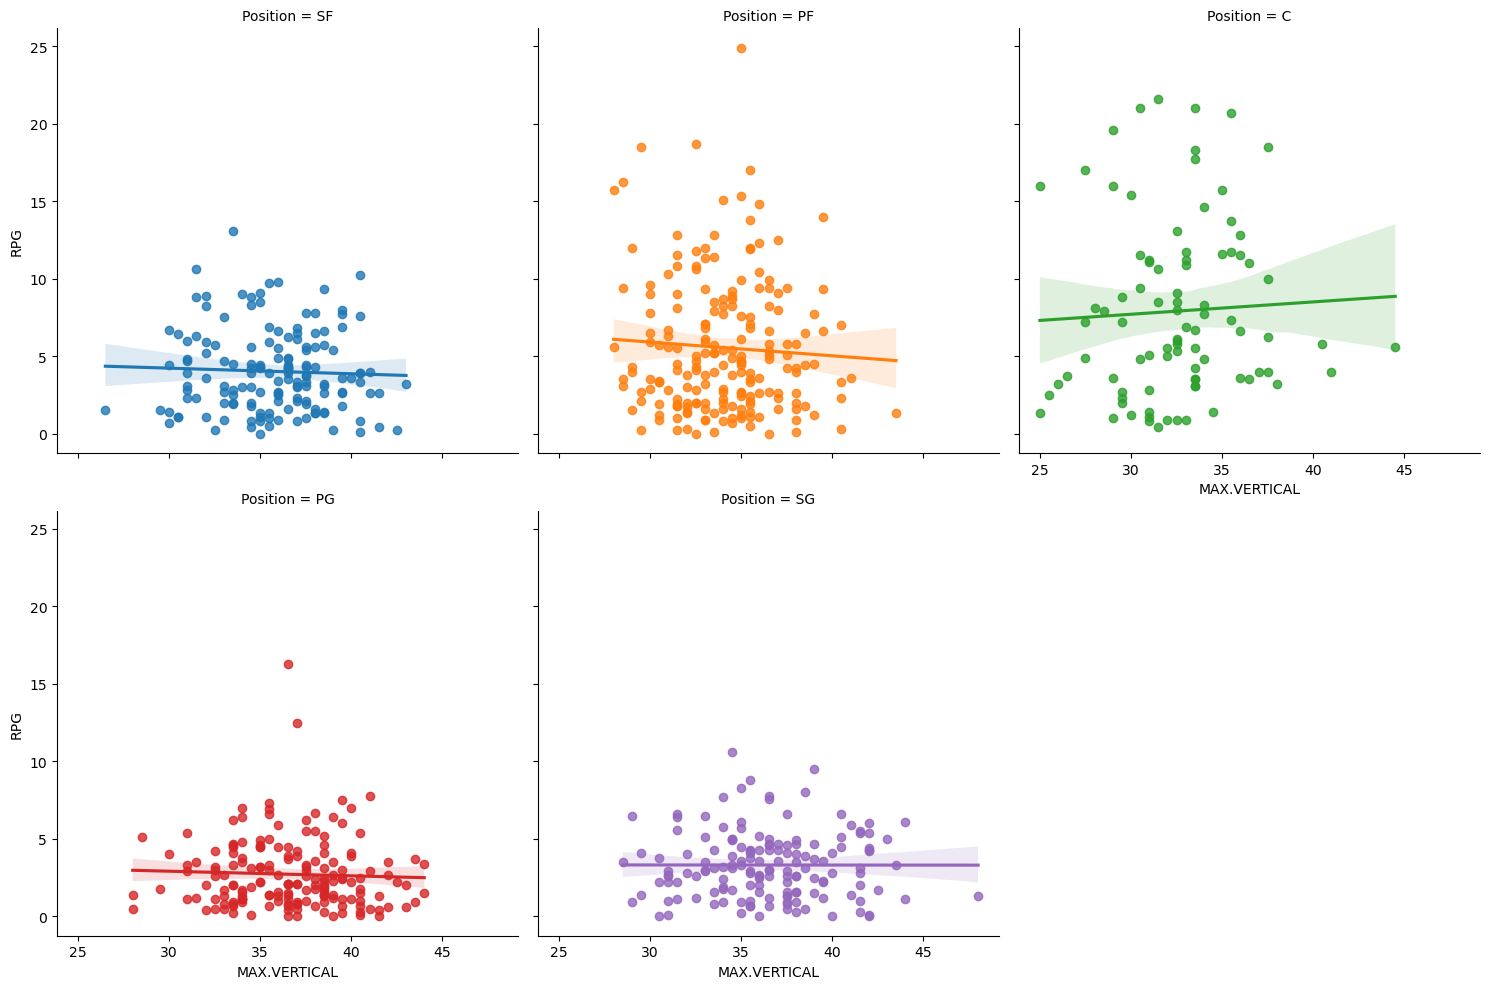

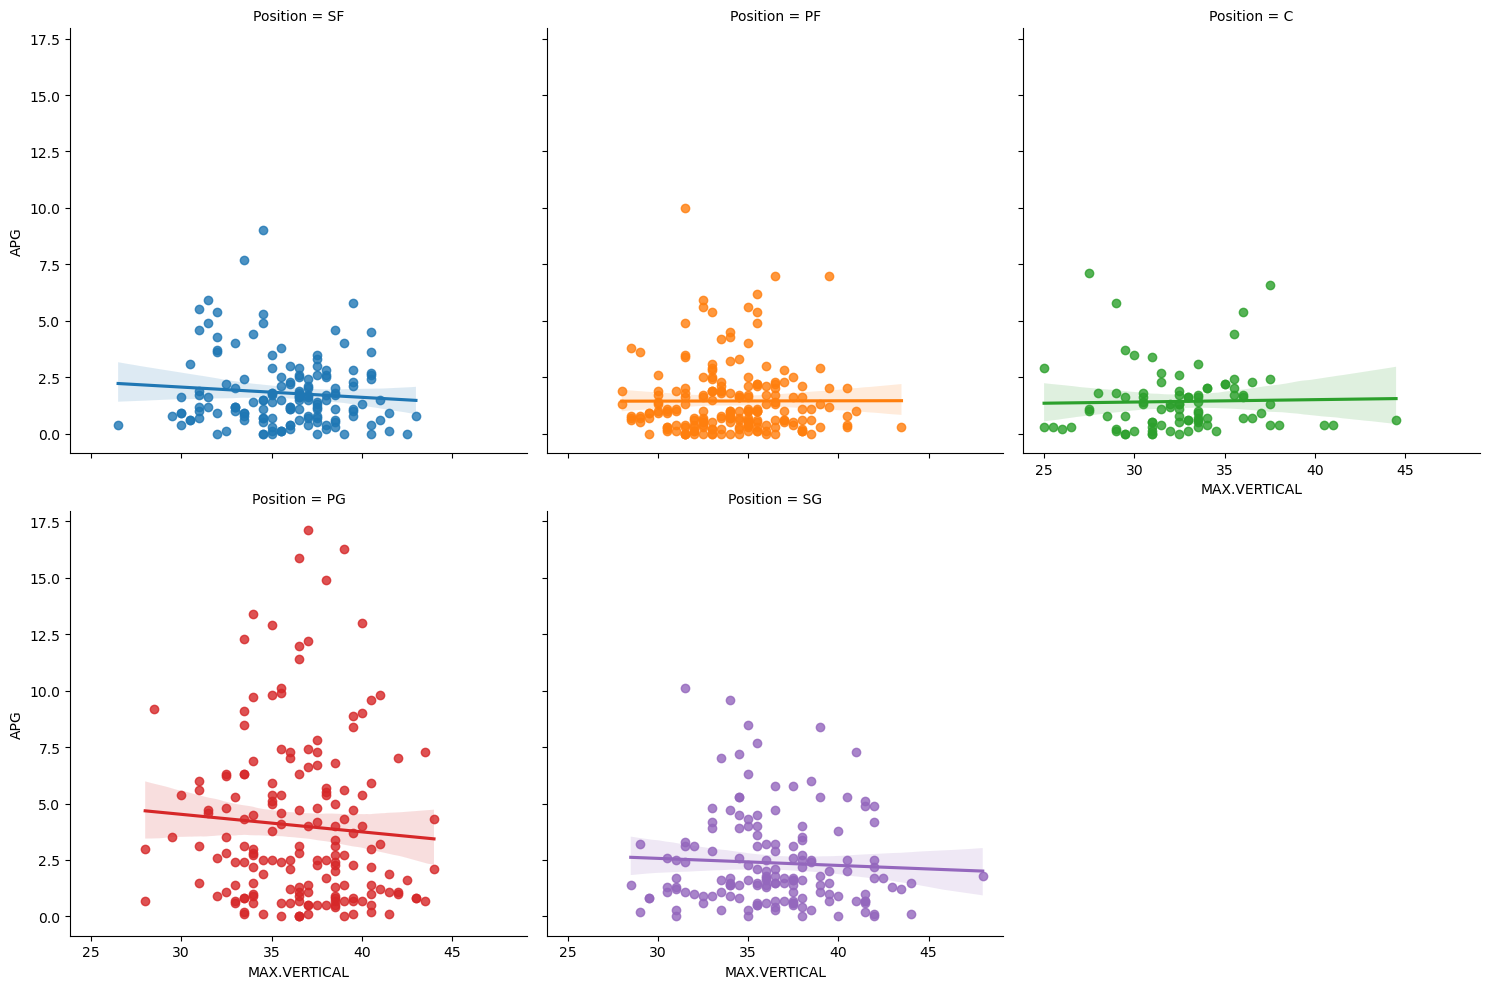

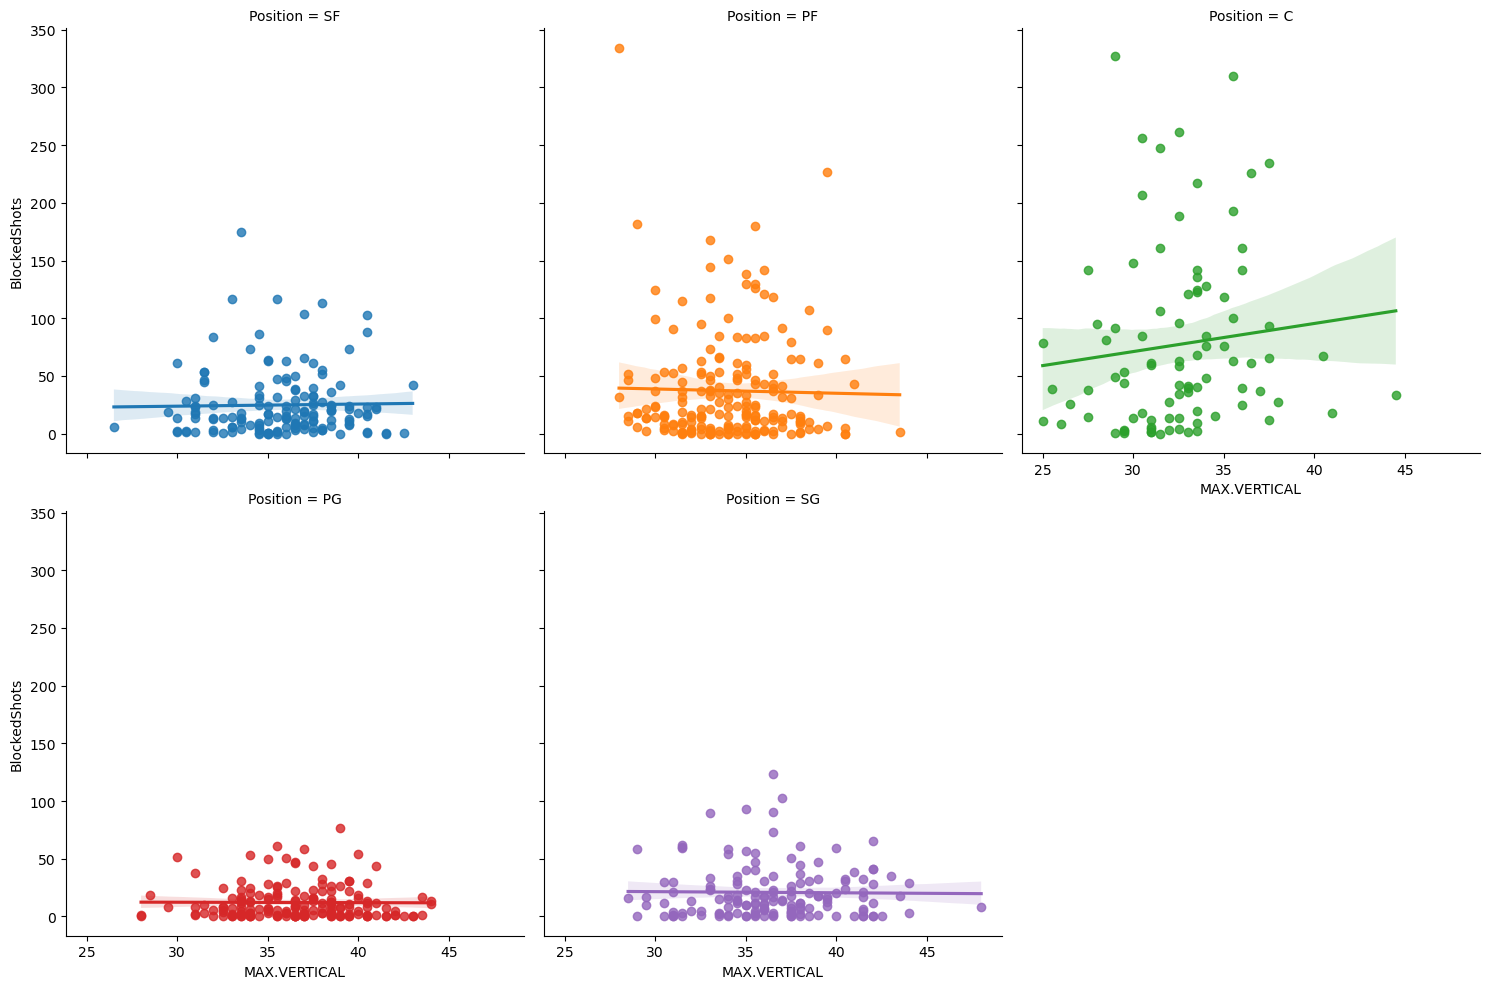

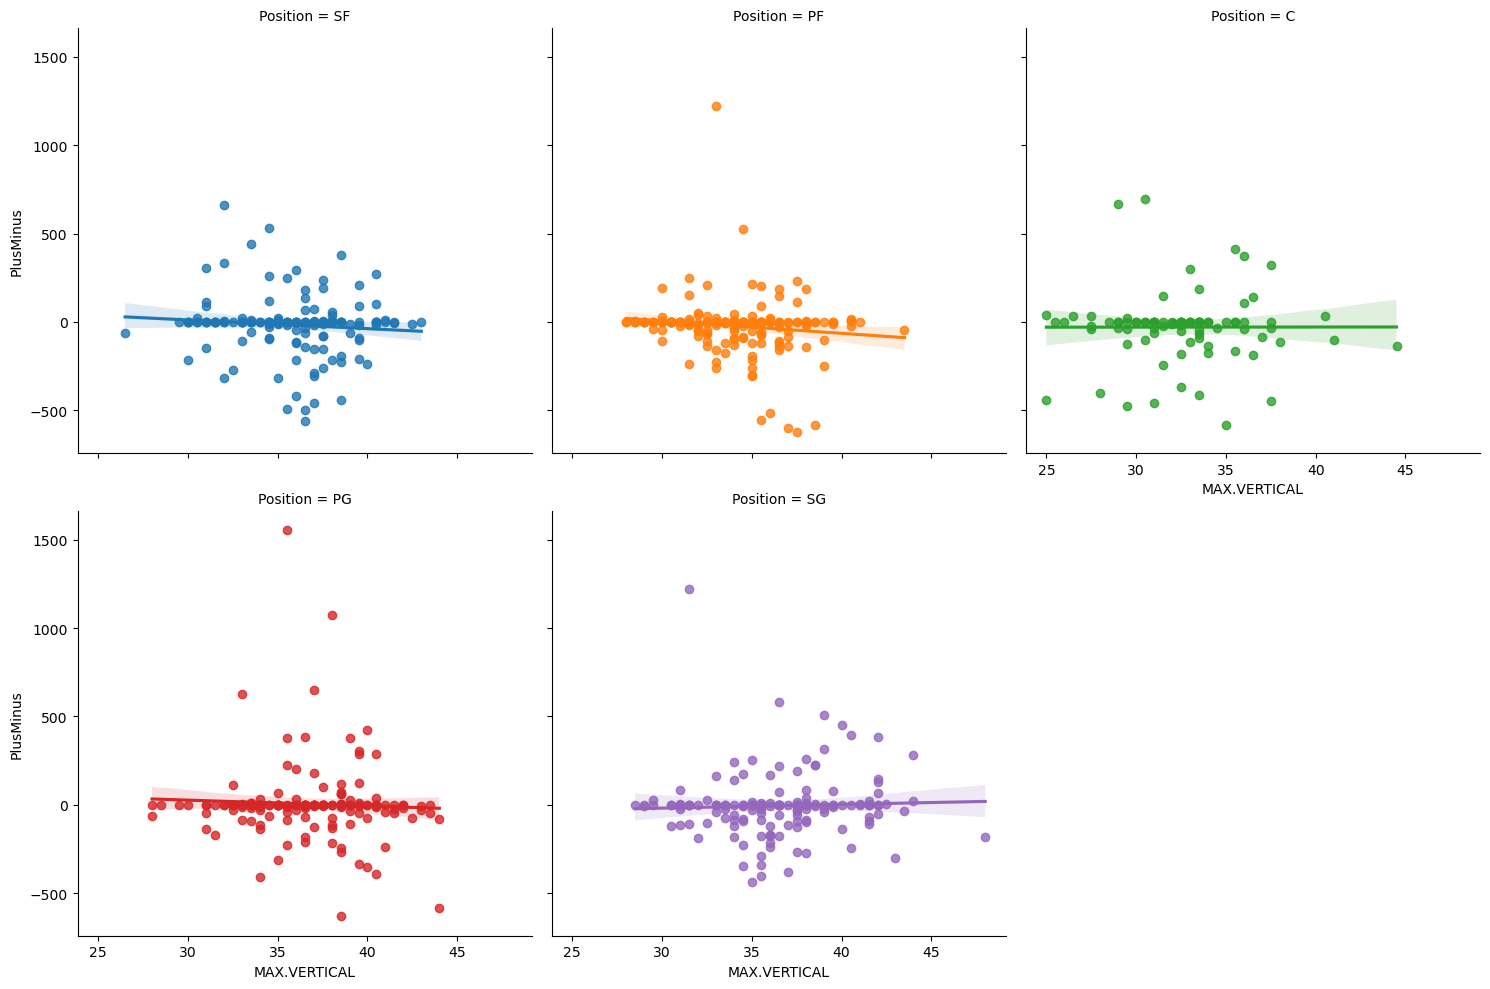

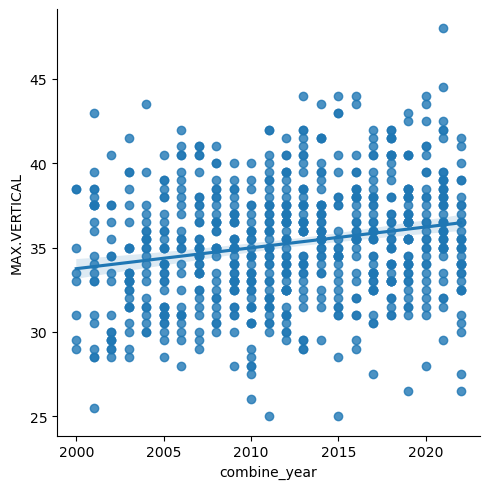

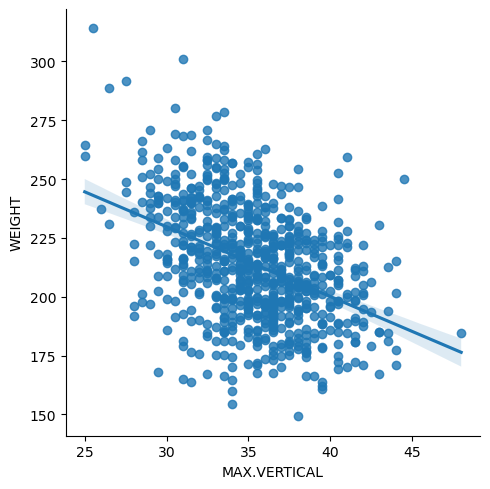

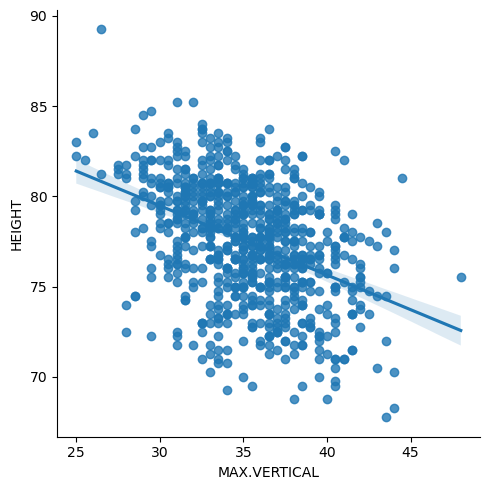

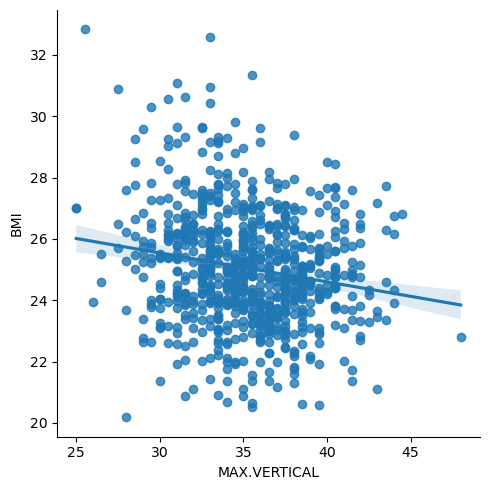

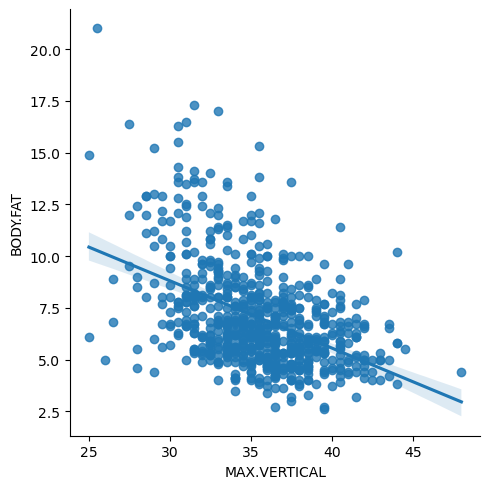

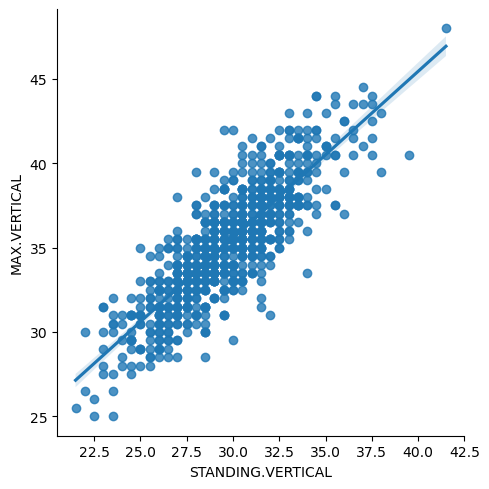

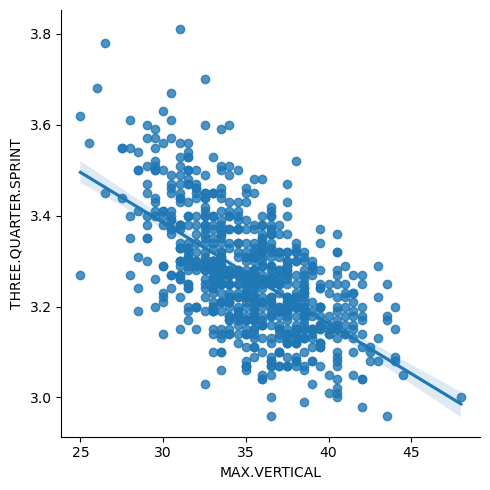

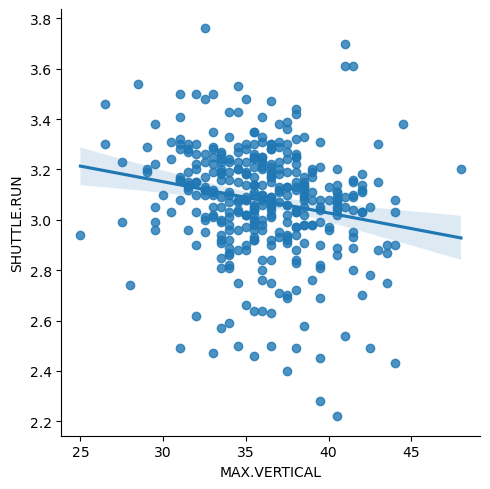

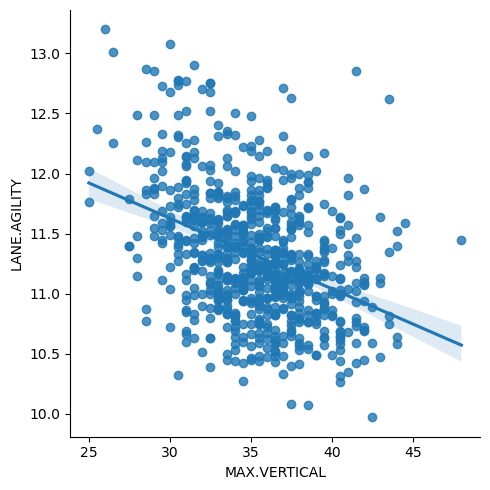

In [224]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(
    data=nba,
    x="Position",
    y="MAX.VERTICAL",
    order= ["PG", "SG", "SF", "PF", "C"]
)
sns.displot(
    data=nba,
    x="MAX.VERTICAL"
)
sns.lmplot(
    data=nba,
    x="MAX.VERTICAL",
    y="PPG",
    hue="Position",
    col="Position",
    col_wrap=3
)
sns.lmplot(
    data=nba,
    x="MAX.VERTICAL",
    y="RPG",
    hue="Position",
    col="Position",
    col_wrap=3
)
sns.lmplot(
    data=nba,
    x="MAX.VERTICAL",
    y="APG",
    hue="Position",
    col="Position",
    col_wrap=3
)
sns.lmplot(
    data=nba,
    x="MAX.VERTICAL",
    y="BlockedShots",
    hue="Position",
    col="Position",
    col_wrap=3
)
sns.lmplot(
    data=nba,
    x="MAX.VERTICAL",
    y="PlusMinus",
    hue="Position",
    col="Position",
    col_wrap=3
)
sns.lmplot(
    data=nba, 
    x="combine_year",
    y="MAX.VERTICAL"
)
sns.lmplot(
    data=nba,
    x="MAX.VERTICAL", 
    y="WEIGHT", 
)
sns.lmplot(
    data=nba,
    x="MAX.VERTICAL", 
    y="HEIGHT", 
)
sns.lmplot(
    data=nba,
    x="MAX.VERTICAL", 
    y="BMI" 
)
sns.lmplot(
    data=nba,
    x="MAX.VERTICAL", 
    y="BODY.FAT", 
)
sns.lmplot(
    data=nba,
    x="STANDING.VERTICAL", 
    y="MAX.VERTICAL", 
)
sns.lmplot(
    data=nba,
    x="MAX.VERTICAL", 
    y="THREE.QUARTER.SPRINT"
)
sns.lmplot(
    data=nba,
    x="MAX.VERTICAL", 
    y="SHUTTLE.RUN"
)
sns.lmplot(
    data=nba,
    x="MAX.VERTICAL", 
    y="LANE.AGILITY"
)

#### Correlation Analysis

I also made a correlation vector for just the combine metric variables to see what was the best physical and athletic predictors for vertical jump.

Unnamed: 0              -0.277047
combine_year             0.278785
HEIGHT                  -0.396406
WEIGHT                  -0.415299
BMI                     -0.197752
BODY.FAT                -0.495951
STANDING.REACH          -0.462754
WINGSPAN                -0.277847
HAND.LENGTH             -0.241322
HAND.WIDTH              -0.125806
STANDING.VERTICAL        0.842795
MAX.VERTICAL             1.000000
LANE.AGILITY            -0.438503
SHUTTLE.RUN             -0.222095
THREE.QUARTER.SPRINT    -0.599470
BENCH.PRESS              0.040901
WINGSPAN.HEIGHT.RATIO    0.143691
STANDING.TOUCH           0.080500
MAX.TOUCH                0.325152
dtype: float64


/var/folders/sz/m07m37v53zbbxzbhqb8tjxjh0000gn/T/ipykernel_4025/2920671386.py:3: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_vector = nba_combine.corrwith(nba_combine['MAX.VERTICAL'])


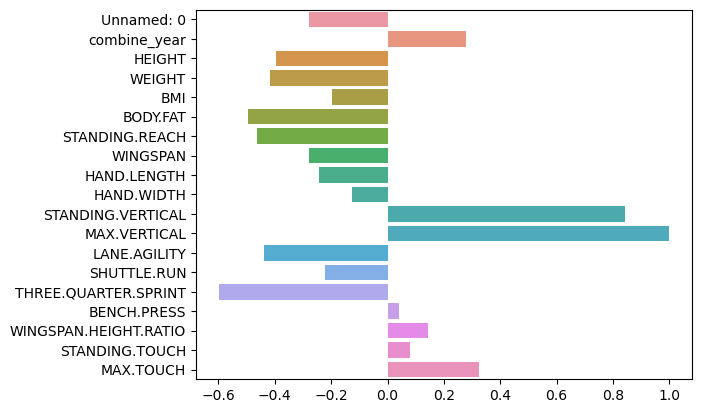

In [210]:

nba_combine = pd.read_csv("../../../data/01-modified-data/cleaned_NBA_combine.csv")

correlation_vector = nba_combine.corrwith(nba_combine['MAX.VERTICAL'])

print(correlation_vector)
sns.barplot(
    x=correlation_vector,
    y=correlation_vector.index   
)

plt.show()

#### Insights

The range and median for maximum vertical jump tend to be higher for positions that typically have smaller players, indicating the importance of agility and leaping ability in these roles. There isn't a strong correlation between points per game (PPG), rebounds per game (RPG), assists per game (APG), and PlusMinus(point differential for when a player is on the court) with maximum vertical jump. However, there is a very weak positive correlation for blocks, primarily for the center position, while other positions show minimal correlation. The distribution of maximum vertical jumps appears to be generally normal, with the peak around 35 inches. There is one data point that could be considered an outlier. The player that represents that data point is Keon Johnson, who tested a combined record 48-inch max vertical jump, which was multiple inches higher than the previous record. Despite this being an outlier, I chose not to discard this data point as it represents a legitimate and official test, and other athletes have tested a number that high in a non-combine setting. On the physical attributes front, weight, height, and BMI exhibit moderate to weak negative correlations. Body fat percentage, on the other hand, displays a moderate negative correlation. The average test result for maximum vertical jump is increasing slightly over time, but not a lot. There is a very strong positive correlation between standing vertical jump and maximum vertical jump, which makes a lot of intuitive sense, as a player who can jump relatively high from a static position would likely jump relatively high with a running start. Moreover, the three-quarter sprint has a strong negative correlation. The shuttle run shows a weak negative correlation, and the lane agility test reveals a moderate negative correlation. The correlation vector for correlation to maximum vertical jump shows that standing vertical, three-quarter sprint, and body fat percentage exhibit the strongest correlations with a player's maximum vertical jump.

As a whole, the data, visualizations, and correlations reveal a few key insights. An NBA player's ability to jump does not seem to have a major correlation to on-court performance as far as basic on-court performance statistics show. Shorter and lighter players tend to jump higher, as shown by the negative correlation between maximum vertical jump and height, weight, and body fat percentage, as well as the distributions by position. This makes sense, as the bigger, heavier, and more body fat a player has, the more force is needed to propel them high when jumping. In addition, athletic abilities like sprint speed, lateral quickness, and ability to quickly change direction translate to jumping higher, as shown by the correlation plots between maximum vertical jump and the three-quarter sprint, lane agility, and shuttle run drill times.


### NFL Combine Data

#### Data Overview

The NFL combine dataset contains 14 features, most of which are continuous and represent combine measurements. The NFL combine only has a standing vertical jump test, so I will be looking to compare the distribution and averages of the NFL combine results the results from the NBA combine.

In [211]:
nfl = pd.read_csv("../../../data/01-modified-data/cleaned_NFL_combine.csv")

print('Shape:', nfl.shape)
print('Feature and Data Information:')
print(nfl.info())

Shape: (4796, 15)
Feature and Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4796 entries, 0 to 4795
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         4796 non-null   int64  
 1   Name               4796 non-null   object 
 2   Pos                4796 non-null   object 
 3   HEIGHT             4796 non-null   int64  
 4   WEIGHT             4796 non-null   int64  
 5   Forty              4751 non-null   float64
 6   STANDING.VERTICAL  4796 non-null   float64
 7   BenchReps          3595 non-null   float64
 8   BroadJump          4658 non-null   float64
 9   Cone               3936 non-null   float64
 10  Shuttle            4002 non-null   float64
 11  combine_year       4796 non-null   int64  
 12  Team               2933 non-null   object 
 13  Round              2933 non-null   float64
 14  Pick               2933 non-null   float64
dtypes: float64(8), int64(4),

#### Summary stats for Variables of interest

The main feature of interest in this dataset is the standing veritcal jump test, since it is essentially the same event that the NBA combine has, making it one of the few official and standardized points of athletic comparison for NFL and NBA players.

In [212]:
print("Standing Vertical Jump Summary Stats (inches)") 
print(nfl["STANDING.VERTICAL"].describe())
print("------------------------------------")

Standing Vertical Jump Summary Stats (inches)
count    4796.000000
mean       32.818599
std         4.213729
min        17.500000
25%        30.000000
50%        33.000000
75%        35.500000
max        46.000000
Name: STANDING.VERTICAL, dtype: float64
------------------------------------


#### Visualizations for NBA combine compared to NFL combine

For visualizations I want to compare the distribution of vertical jump test results as well as if the correlation to physical attributes like height and weight differs between the two leagues. In order to look at this I will be using boxplots and scatterlots from a merged dataset that contains NBA and NFL combine results.

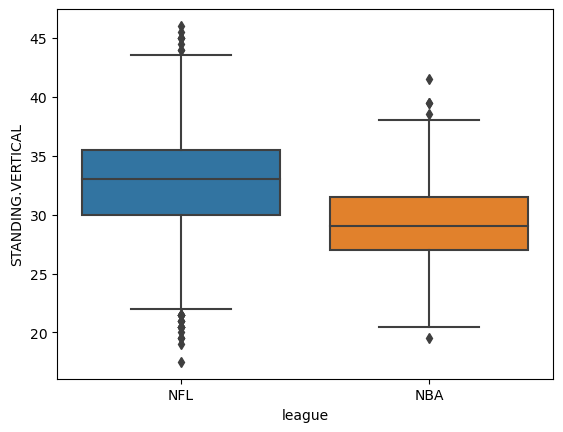

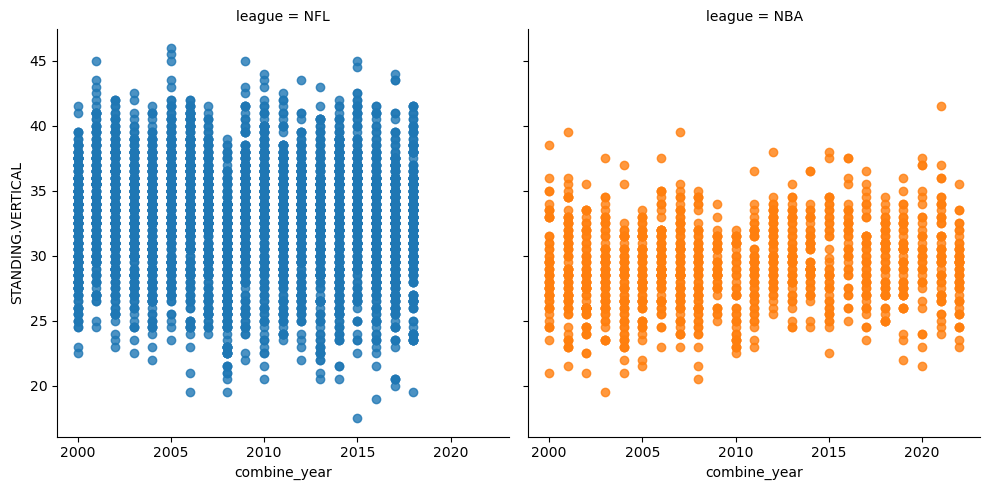

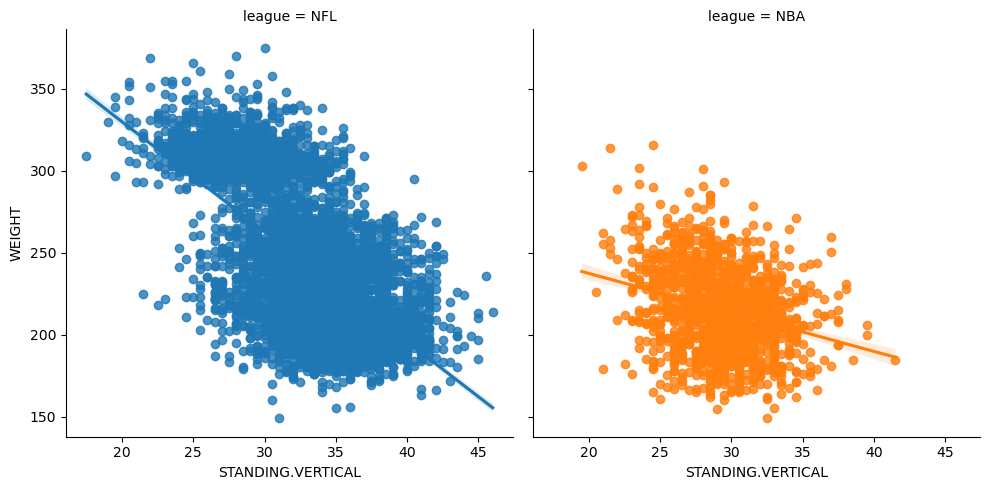

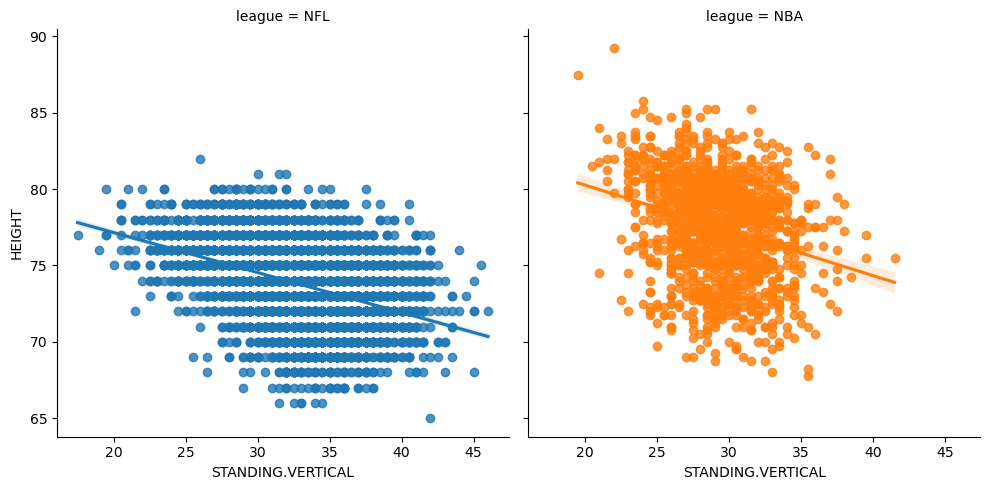

In [226]:
nba_combine = pd.read_csv("../../../data/01-modified-data/cleaned_NBA_combine.csv")

nba_combine['league'] = "NBA"
nfl['league'] = "NFL"
nba_nfl = pd.concat([nfl,nba_combine], join='inner')


sns.boxplot(
    data=nba_nfl,
    x="league",
    y="STANDING.VERTICAL"
)

sns.lmplot(
    data=nba_nfl,
    x='combine_year',
    y='STANDING.VERTICAL',
    hue='league',
    col='league',
    fit_reg=False
)

sns.lmplot(
    data=nba_nfl,
    x='STANDING.VERTICAL',
    y= 'WEIGHT',
    hue='league',
    col='league'
)

sns.lmplot(
    data=nba_nfl,
    x='STANDING.VERTICAL',
    y= 'HEIGHT',
    hue='league',
    col='league'
)


#### Insights

In analyzing the Exploratory Data analysis findings between the NFL and NBA, it becomes evident that the NFL exhibits a larger range, median, and maximum value in standing vertical jump compared to the NBA. Notably, when examining the correlation between weight and vertical jump performance in their respective combines, it is apparent that weight has a more pronounced negative correlation in the NFL combine. Height displays a weak negative correlation in both leagues, indicating that it may not significantly impact athletic success in either context. Vertical jump test performance does not significantly change over time in both the NFL and NBA.

These findings reveal a few key insights that make a lot of intuitive sense when looking at the nature of the respective sports. While basketball involves the actual action of jumping much more frequently than jumping, every play in football starts from a static position. So, it would make sense that, on average, a football player would be better at exerting power and force from a static position since they do so during every play. I would think that NBA players would be better at jumping with momentum, but any person who can jump well from a standing position would also likely jump high with a running start. And since the NFL does not have a maximum vertical jump test, we are unable to definitively say which players would be better at jumping with momentum, but I would imagine the NFL players would also have a slight edge in that. The greater range and more pronounced negative correlation to weight also makes a lot of sense because of the range of positions in the NFL. NBA players all play a relatively similar role on the court, and all positions require a well-balanced athlete. Positions in the NFL, on the other hand, vary much more drastically. As linemen require size and strength much more than “skill positions” like wide receivers, which favor quick and agile athletes. Overall, the results reflect the nature of the sport and the way they translate to the standing vertical jump test.

### Olympic High Jump Data

#### Data Overview

The Olympic high jump dataset has 9 features, most of which are categorical. Since Olympic high jump is measured much differently than the NBA and NFL combine, it is not useful to compare the numeric results, rather I am interested in looking at the distribution of the results, the change in results over time, and the distribution of nationalities in medaling place, as the olympics represent a large sample size of nationalities.

In [214]:
high_jump = pd.read_csv("../../../data/01-modified-data/cleaned_high_jump.csv")

print('Shape:', high_jump.shape)
print('Feature and Data Information:')
print(high_jump.info())

Shape: (107, 10)
Feature and Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       107 non-null    int64  
 1   Gender           107 non-null    object 
 2   Event            107 non-null    object 
 3   Location         107 non-null    object 
 4   Year             107 non-null    int64  
 5   Medal            107 non-null    object 
 6   Name             107 non-null    object 
 7   Nationality      107 non-null    object 
 8   Best Height (m)  104 non-null    float64
 9   Unnamed: 8       0 non-null      float64
dtypes: float64(2), int64(2), object(6)
memory usage: 8.5+ KB
None


#### Summary stats for Variables of interest

In [215]:

print("Best Height (meters) Summary Stats") 
print(high_jump["Best Height (m)"].describe())
print("------------------------------------")

Best Height (meters) Summary Stats
count    104.000000
mean       2.023846
std        0.243316
min        1.600000
25%        1.880000
50%        2.010000
75%        2.290000
max        2.390000
Name: Best Height (m), dtype: float64
------------------------------------


#### Visualizations

For visualizations I used histograms and scatterplots to look at the distribution of results and countries, as well as the results over time. Since the Olympic dataset contains the results from both the men's and women's events, I included both but seperated them.

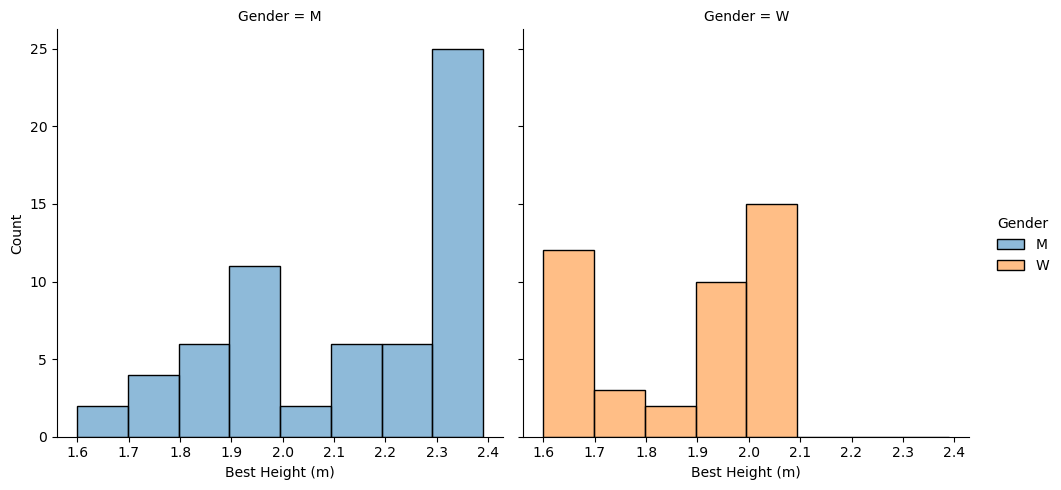

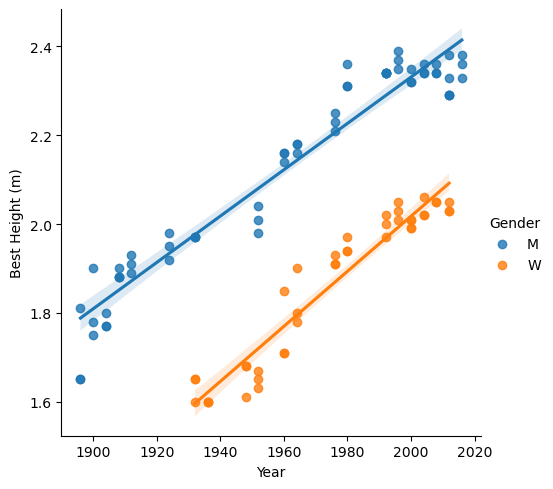

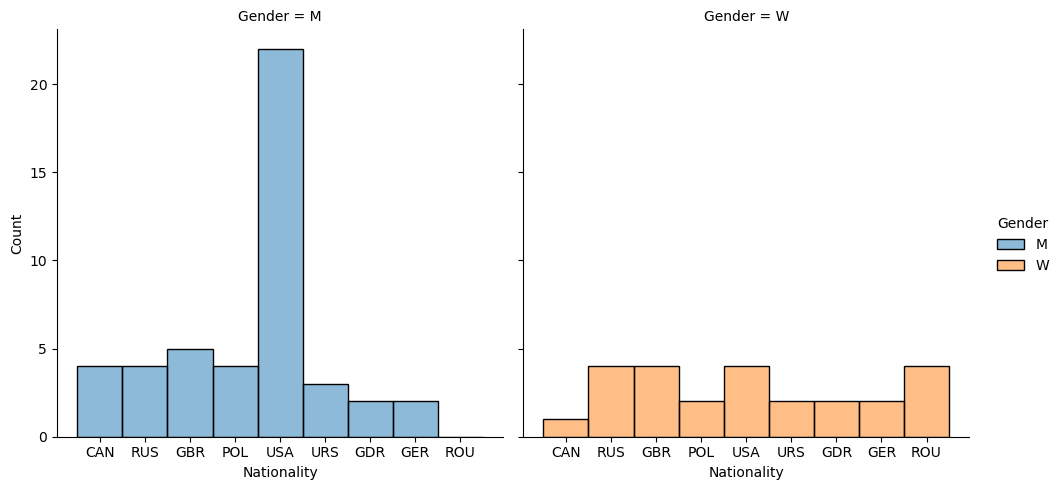

In [228]:
sns.displot(
    data=high_jump,
    x="Best Height (m)",
    hue = 'Gender',
    col = 'Gender'
)

sns.lmplot(
    data=high_jump,
    x="Year",
    y="Best Height (m)",
    hue='Gender'
    
)

counts = high_jump["Nationality"].value_counts()
filtered_high_jump = high_jump[high_jump["Nationality"].isin(counts[counts > 3].index)]
sns.displot(
    data=filtered_high_jump,
    x="Nationality",
    hue = 'Gender',
    col= 'Gender'
)

#### Insights

EDA reveals that the distribution of the best height for both genders is not normal, but heavily left skewed. Additionally, it is evident that best height shows a robust positive correlation with time. In the men's events, the United States outshines other countries with a significantly higher count of medal placements. In contrast, the women's events exhibits a more equitable distribution of medals among several different nations.

A few insights can be made from these results. While the NBA and NFL combine datasets do not reveal much change on average performance year after year, when looking at a dataset that represents a much longer timespan like 100 years of results, it becomes evident that athletes are continuing to perform better and better over time, just not at a rate which can be seen year to year. It also seems that at least for the Olympic event of high jump, men from the United States represent a huge number of medaling athletes. However I am very hesitant to make any conclusion that this means men from the US jump higher than those from other countries, since there are so many other factors that contribute to an olympic team’s success such as funding.


### Stretching Data


#### Data Overview

The stretching dataset has 9 features, most of which are continuous. The data represents the results of a study that looked at the vertical jump height of a group of recreational athletes and collegiate students before and after doing dynamic stretching. The main interest with this dataset is to look at the range of improvement that occured among the participants. 

In [217]:
stretching = pd.read_csv("../../../data/01-modified-data/cleaned_stretching.csv")

print('Shape:', stretching.shape)
print('Feature and Data Information:')
print(stretching.info())

Shape: (50, 10)
Feature and Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 10 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Unnamed: 0                             50 non-null     int64  
 1   Participant number                     50 non-null     int64  
 2   Group                                  50 non-null     int64  
 3   Age                                    50 non-null     int64  
 4   Gender                                 50 non-null     object 
 5   Height ( Cm )                          50 non-null     float64
 6   Weight ( Kg )                          50 non-null     int64  
 7   BMI                                    50 non-null     float64
 8   Vertical jump
 height ( Pre ) ( Cm )   50 non-null     int64  
 9   Vertical jump
 height ( Post ) ( Cm )  50 non-null     float64
dtypes: float64(3), int64(6), objec

#### Summary stats for Variables of interest

In [218]:
print("Pre dynamic stretching Vertical jump results (cm)")
print(stretching["Vertical jump\n height ( Pre ) ( Cm )"].describe())
print("------------------------------------")

print("Post dynamic stretching Vertical jump results (cm)")
print(stretching["Vertical jump\n height ( Post ) ( Cm )"].describe())
print("------------------------------------")

Pre dynamic stretching Vertical jump results (cm)
count    50.000000
mean     30.900000
std       9.256548
min      15.000000
25%      25.000000
50%      28.500000
75%      35.750000
max      49.000000
Name: Vertical jump\n height ( Pre ) ( Cm ), dtype: float64
------------------------------------
Post dynamic stretching Vertical jump results (cm)
count    50.000000
mean     33.950000
std      10.204166
min      16.000000
25%      26.250000
50%      32.500000
75%      39.000000
max      57.000000
Name: Vertical jump\n height ( Post ) ( Cm ), dtype: float64
------------------------------------


#### Visualizations

For visualizations I used boxplots and a histogram to look at the before and after results.

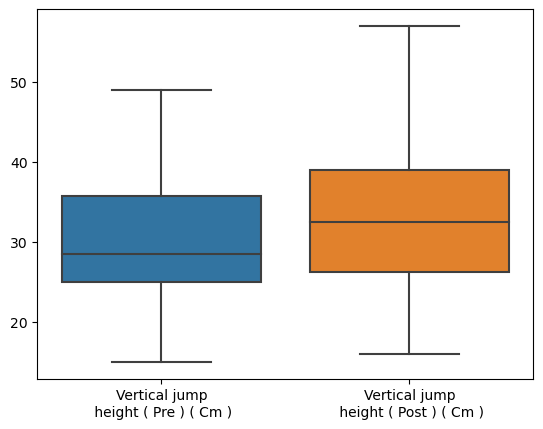

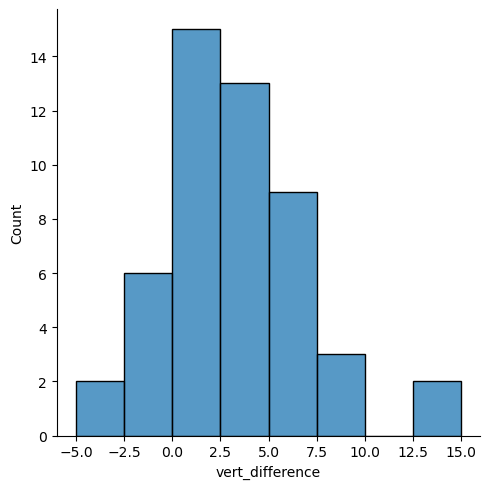

In [230]:

pre_post = stretching[["Vertical jump\n height ( Pre ) ( Cm )", "Vertical jump\n height ( Post ) ( Cm )", 'Gender' ]]
stretching['vert_difference'] = stretching["Vertical jump\n height ( Post ) ( Cm )"] - stretching["Vertical jump\n height ( Pre ) ( Cm )"]
sns.boxplot(
    data= pre_post
)

sns.displot(
    data=stretching,
    x='vert_difference'
)


#### Insights

The visualizations and summary stats show that the median and majority of participants saw an increase in vertical jump height following the dynamic stretching. The distribution of the distance is slightly skewed to the right with most seeing a small increase, a few seeing a decrease, and a few seeing a sizable increase in height. From this it can be inferred that warming up with movement and stretching for most people will likely have a positive effect on vertical jump height, or at least under the circumstances of the study.

### Hypothesis Refinement and General insights

Before performing EDA, I originally hypothesized:

- Smaller and lighter players will tend to jump higher.
- Jumping higher slightly correlates with better on court performance.
- Agility and speed will have positive correlation to vertical jump.
- Nationality will not play a major role in vertical jump.
- Athletes are jumping higher over time.
- Players from other sports will have a similar vertical jump ability depending on the athleticism requiem in the sport.
- Warming up and stretching moderately improves vertical jump.

After performing EDA and examining the results, I believe that, for the most part, my initial hypotheses were validated. Smaller and lighter players indeed tend to achieve higher vertical jumps, as evidenced by the negative correlation between weight and maximum vertical jump in both the NBA and NFL datasets. However, when it comes to on-court performance, there isn't a strong correlation between maximum vertical jump and traditional statistics like points per game, rebounds, assists, and point differentials. In contrast, agility and speed tests, including the three-quarter sprint, lane agility, and shuttle run, show positive correlations with vertical jump, aligning with the hypothesis that these factors influence jumping ability. Furthermore, the data suggests that nationality does not significantly impact vertical jump performance, particularly evident in the Olympic high jump dataset. There is a slight increase in average maximum vertical jump results over time, but this is only made evident when looking at a large timespan rather than year to year. The impact of different sports on vertical jump ability and the influence of warming up through dynamic stretching are areas that require further exploration. Notably, the dynamic stretching study supports the notion that a warm-up involving movement and stretching can have a positive effect on vertical jump height for most participants.

